# Bird Audio classification with Machine Learning

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 


In [0]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

dataset =pd.read_csv('/content/drive/My Drive/works/birdclassification/extractedfeaturesnew.csv')
print("Shape:",rawdataset.shape)

dataset.info()

dataset.describe().transpose()

Shape: (13810, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13810 entries, 0 to 13809
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  13810 non-null  int64  
 1   0           13810 non-null  float64
 2   1           13810 non-null  float64
 3   2           13810 non-null  float64
 4   3           13810 non-null  float64
 5   4           13810 non-null  float64
 6   5           13810 non-null  float64
 7   6           13810 non-null  float64
 8   7           13810 non-null  float64
 9   8           13810 non-null  float64
 10  9           13810 non-null  float64
 11  10          13810 non-null  float64
 12  11          13810 non-null  float64
 13  12          13810 non-null  float64
 14  label       13810 non-null  object 
dtypes: float64(13), int64(1), object(1)
memory usage: 1.6+ MB


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,13810.0,31.688414,23.152087,0.000000,13.000000,28.000000,47.000000,185.000000
0,13810.0,-361.035734,163.435725,-1019.575130,-419.858915,-335.178390,-253.439625,-11.904301
1,13810.0,-29.533878,85.990310,-288.663880,-82.874098,-18.640170,30.914580,177.674010
2,13810.0,1.479766,59.369246,-208.288100,-33.373009,2.696989,43.263445,150.488190
3,13810.0,3.098686,39.651468,-114.982925,-22.305666,1.278199,26.166179,171.101970
4,13810.0,-6.744364,28.637323,-114.816666,-23.985521,-5.141370,11.465816,99.768005
5,13810.0,1.888483,24.410284,-86.445724,-14.993272,1.831820,16.837846,108.024475
6,13810.0,-10.329901,21.926009,-96.369830,-25.013602,-8.672877,4.216617,59.458122
7,13810.0,2.729553,18.830244,-79.352770,-9.125139,2.804203,14.665482,82.293710
8,13810.0,-7.023453,16.863605,-84.771440,-17.299814,-6.861155,3.375306,67.739510


In [0]:

dataset.drop(['Unnamed: 0'], axis = 1, inplace = True)
dataset.head(10)



In [0]:
dataset['label'].value_counts() 

major          379
montanus       360
palustris      354
fluviatilis    271
europaeus      257
              ... 
urbicum         77
decaocto        75
squatarola      53
flammea         50
apivorus        35
Name: label, Length: 85, dtype: int64

We can see that dataset is Imbalanced

## Exploratory Data Analysis and Data Cleaning

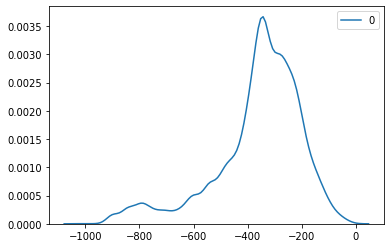

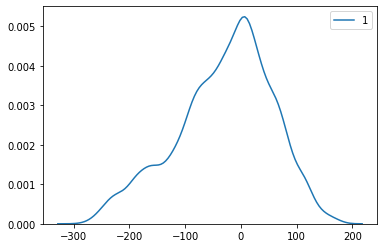

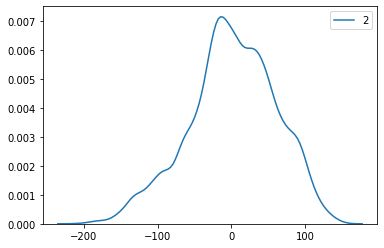

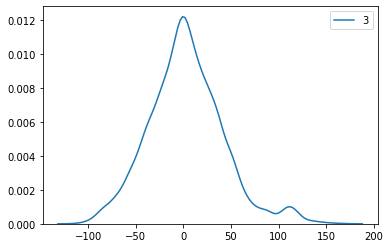

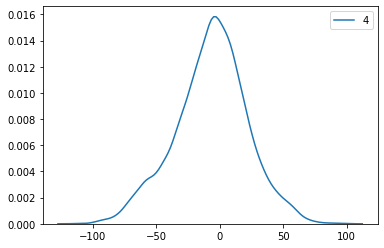

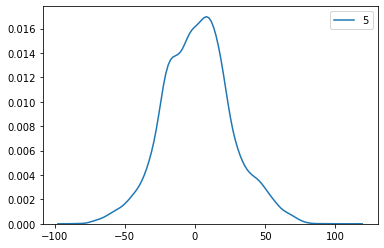

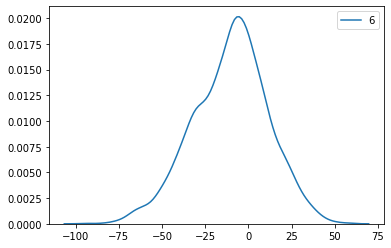

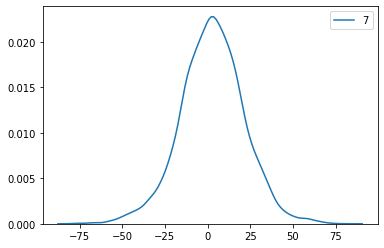

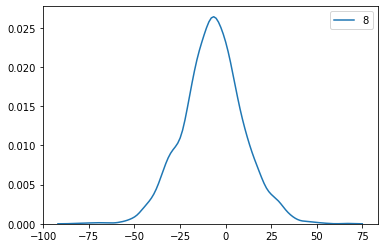

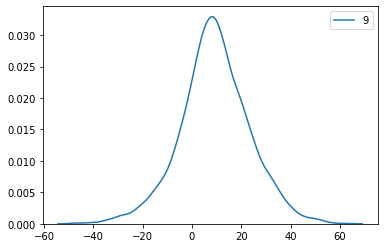

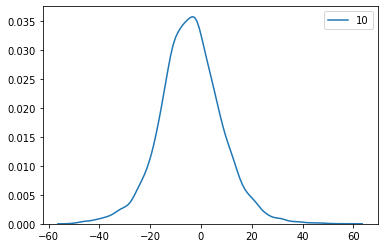

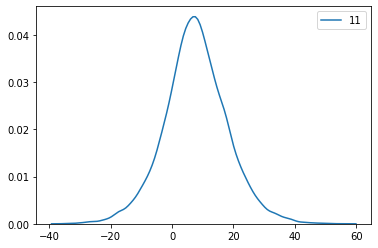

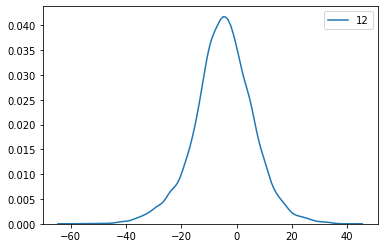

In [0]:

def cont_plotter(non_categorical_features, df):
    for c in non_categorical_features:
        sns.kdeplot(df[c])
        plt.show()
        
features=list(dataset.columns)[:13]
cont_plotter(features, dataset)


In [0]:

X = dataset.drop(['label'], axis = 1) #variables 
y = dataset.label.values  #target
descriptors=list(X.columns)

In [0]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

# train 
train = X_train
train["target"]=y_train

# test
test = X_test
test["target"]=y_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


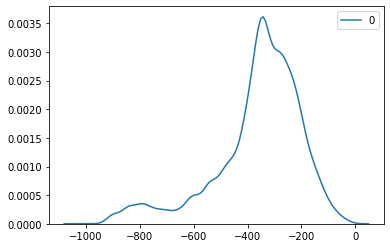

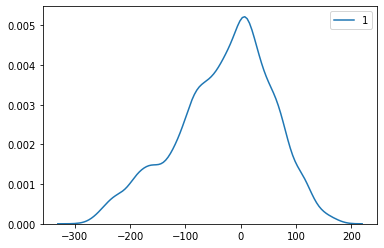

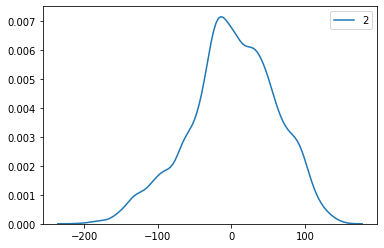

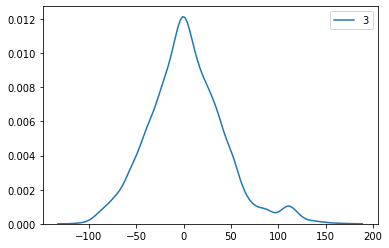

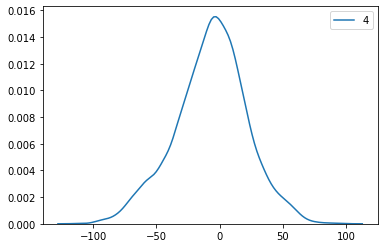

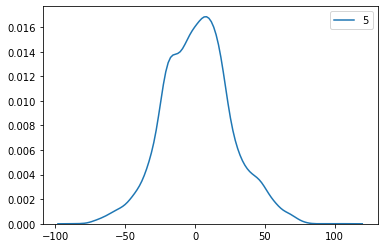

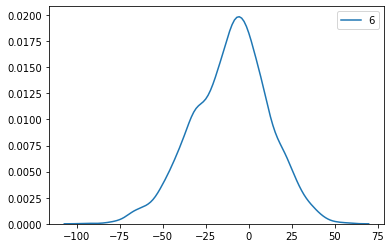

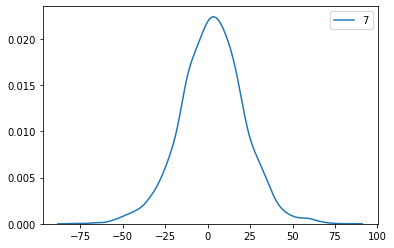

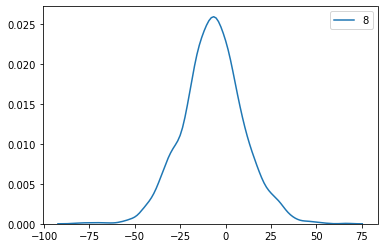

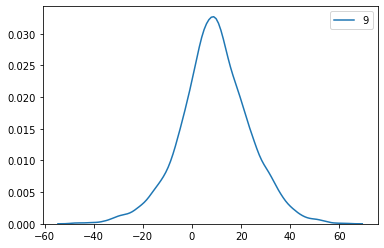

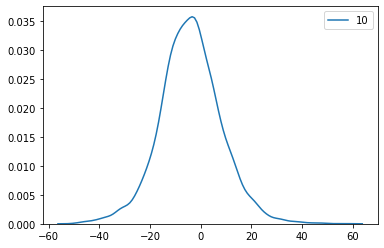

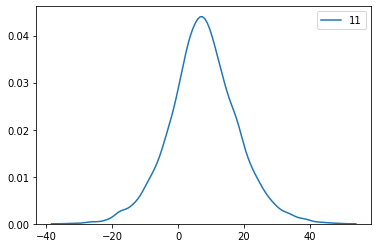

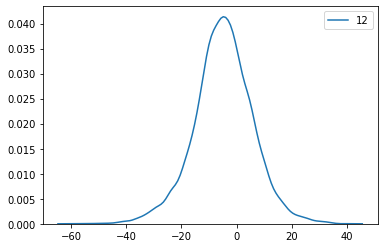

In [0]:

cont_plotter(list(train.columns)[:-1], train)

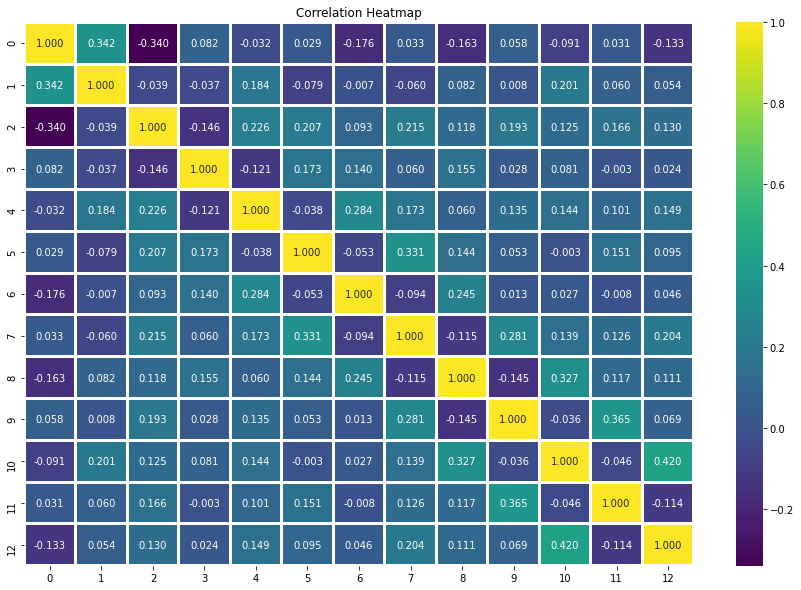

In [0]:


plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True,cmap='viridis',fmt='.3f',linewidths=2)
plt.title("Correlation Heatmap")
plt.show()

No strong Correlations 


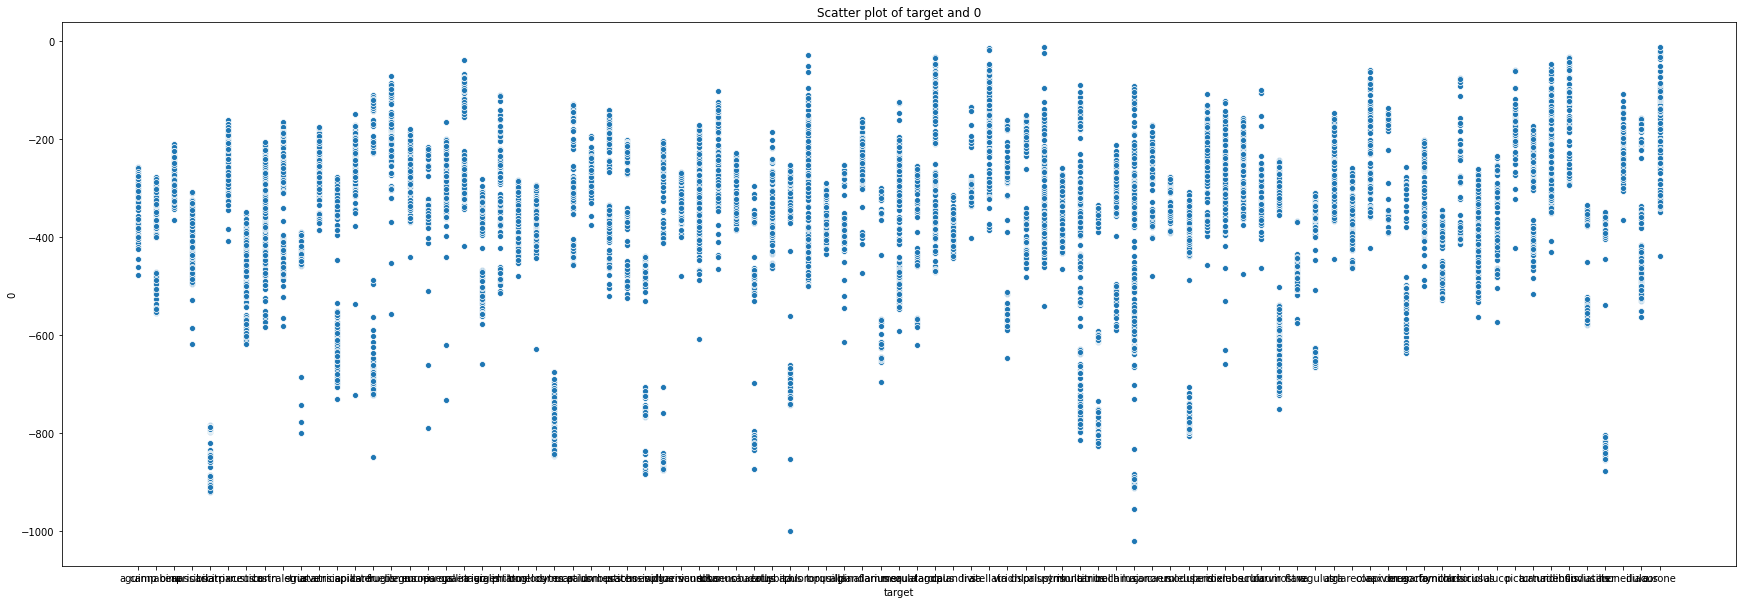

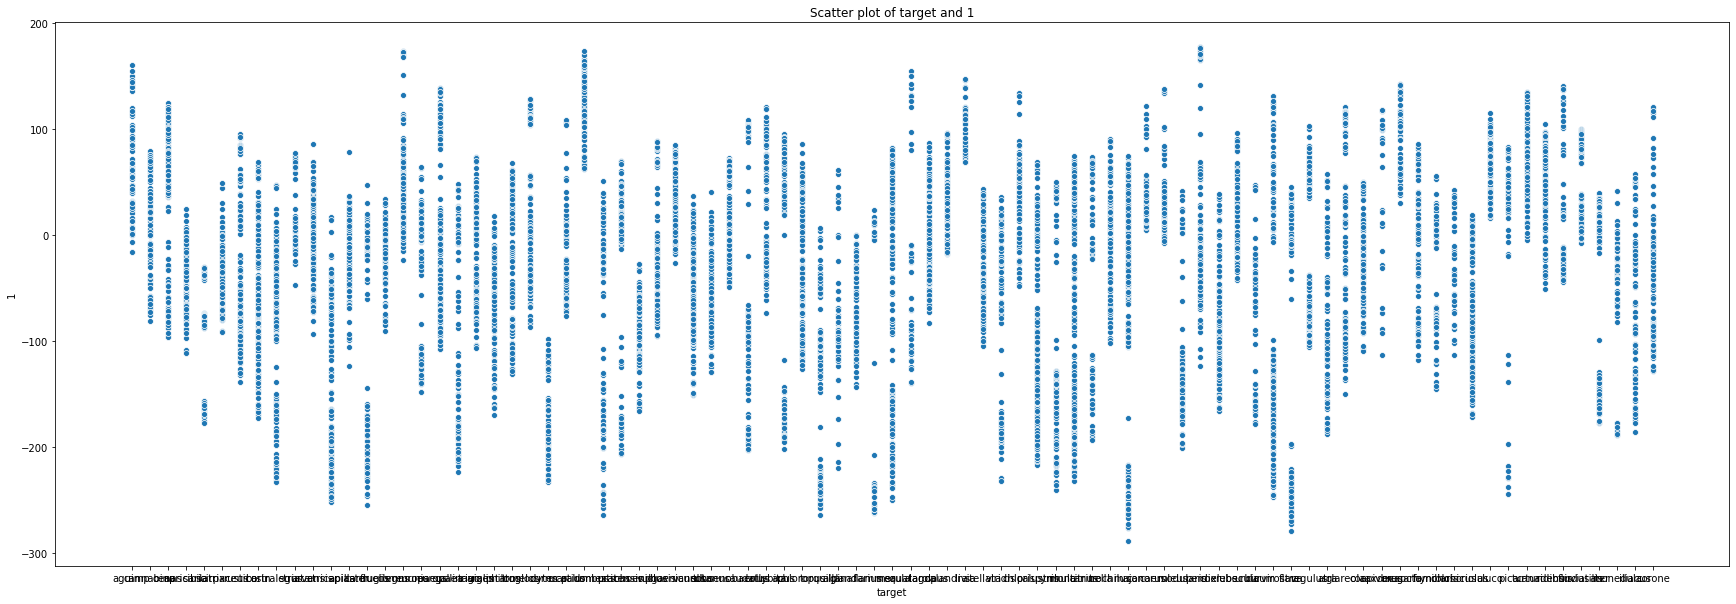

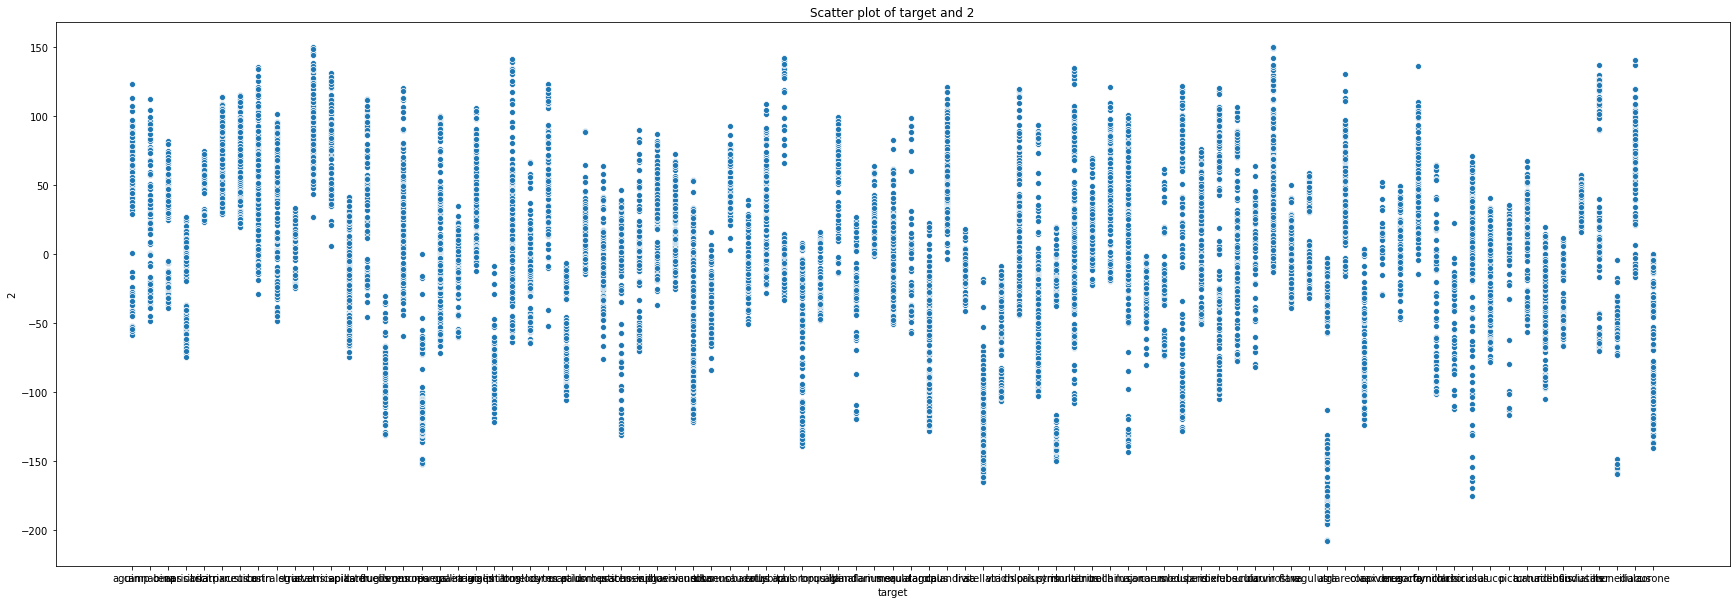

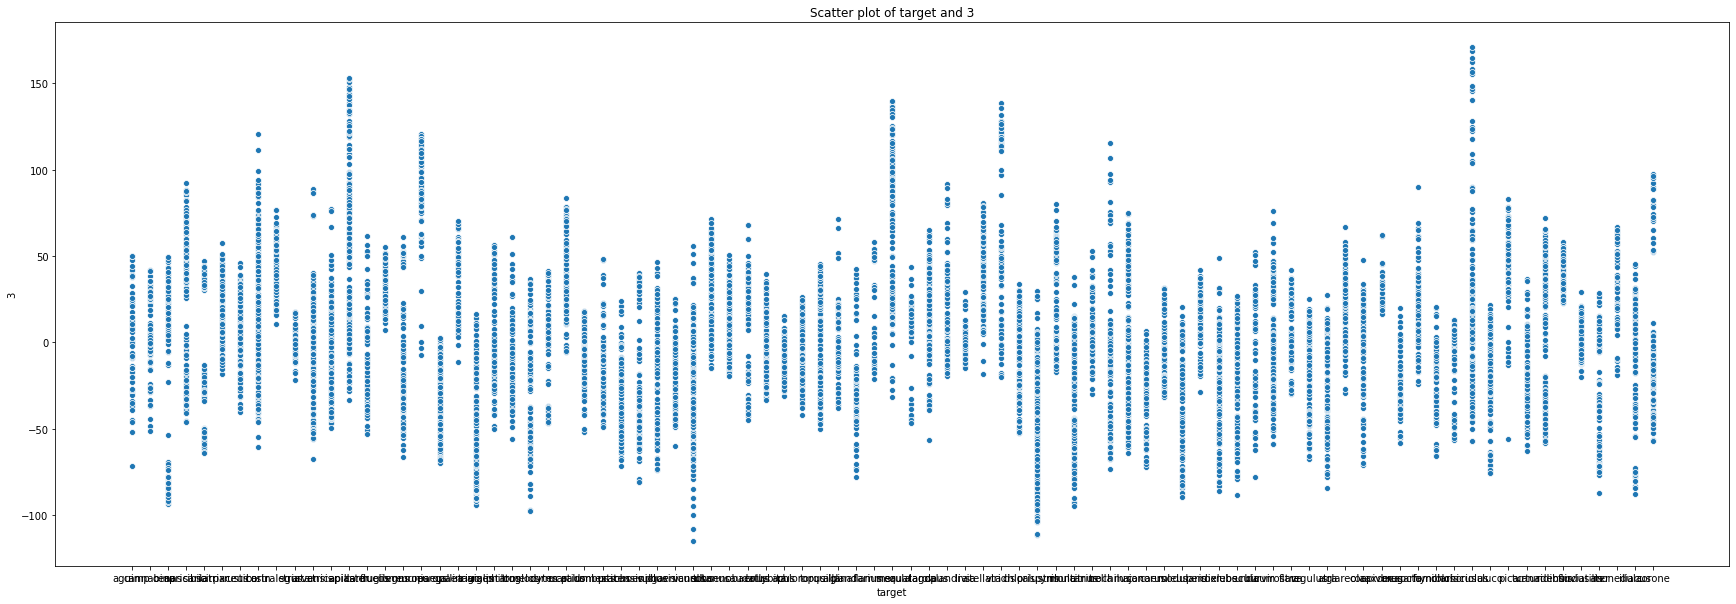

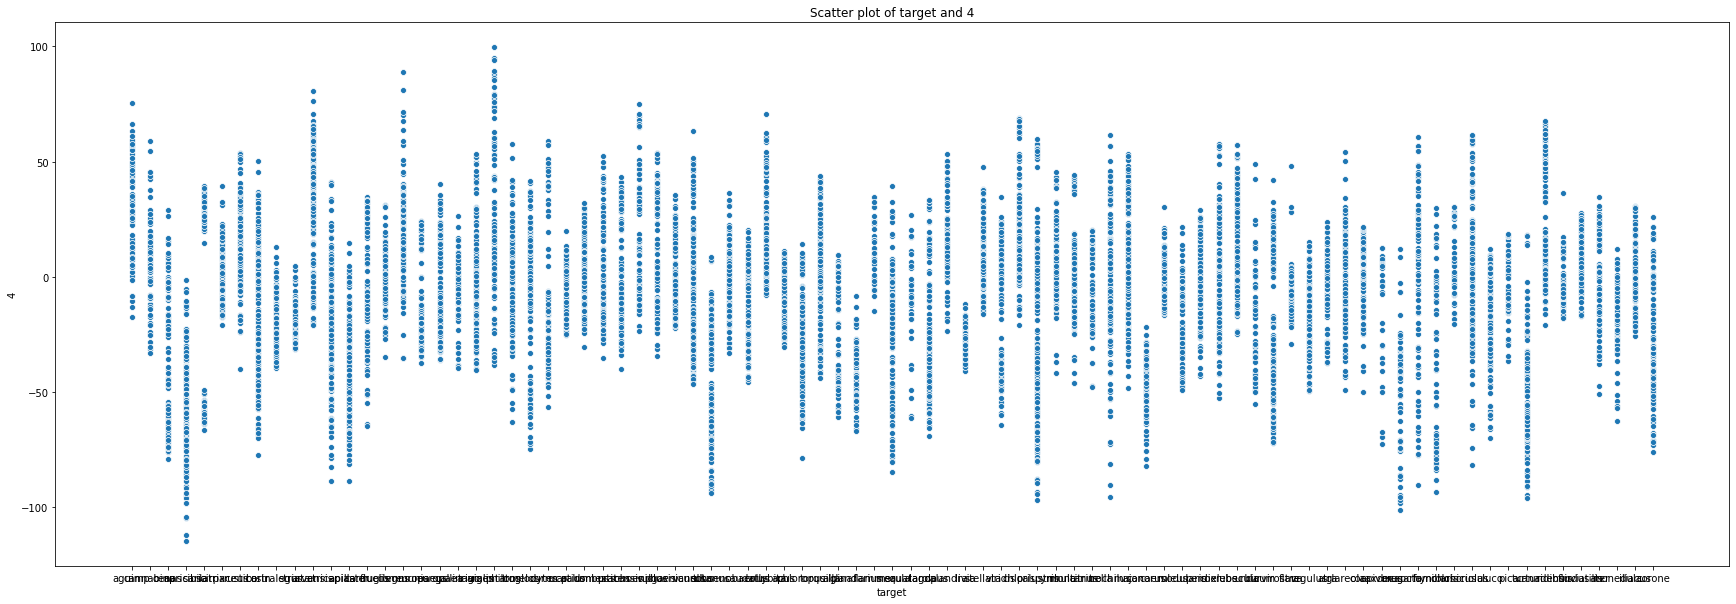

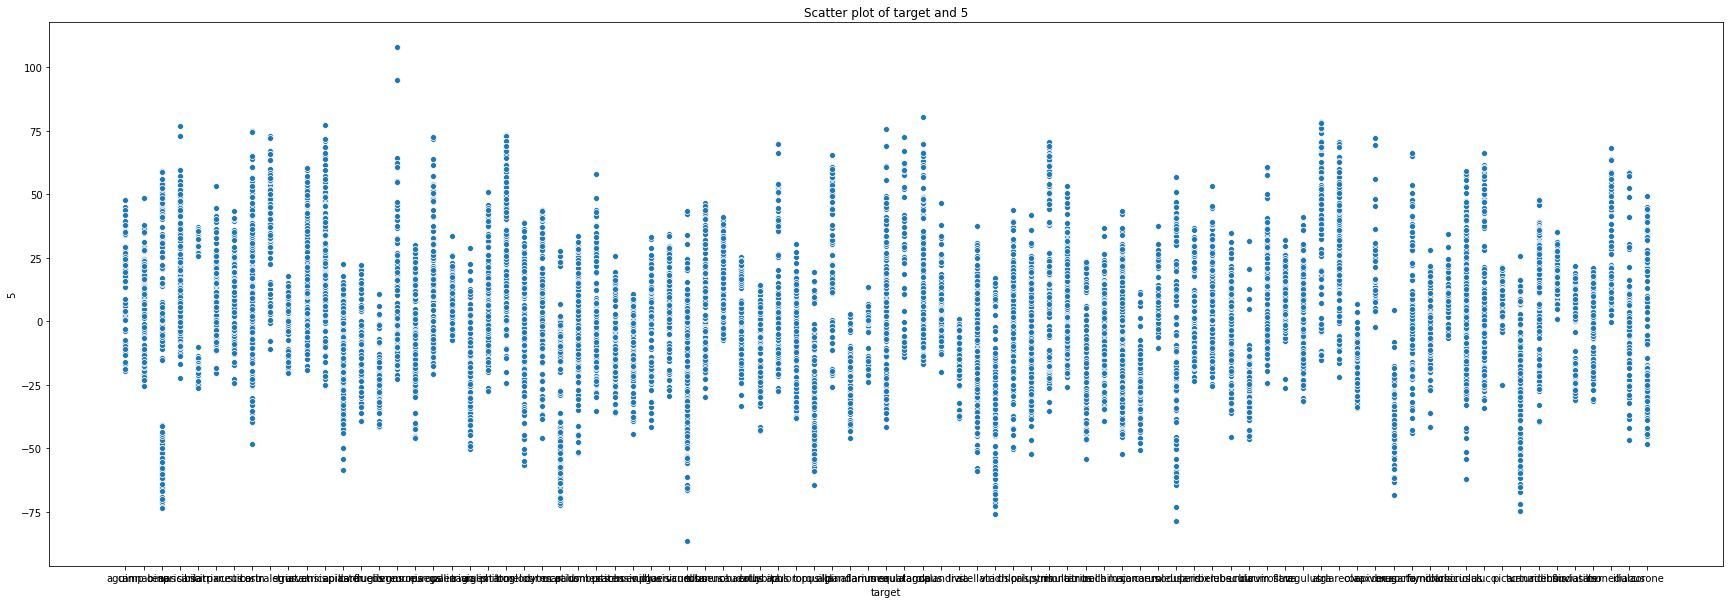

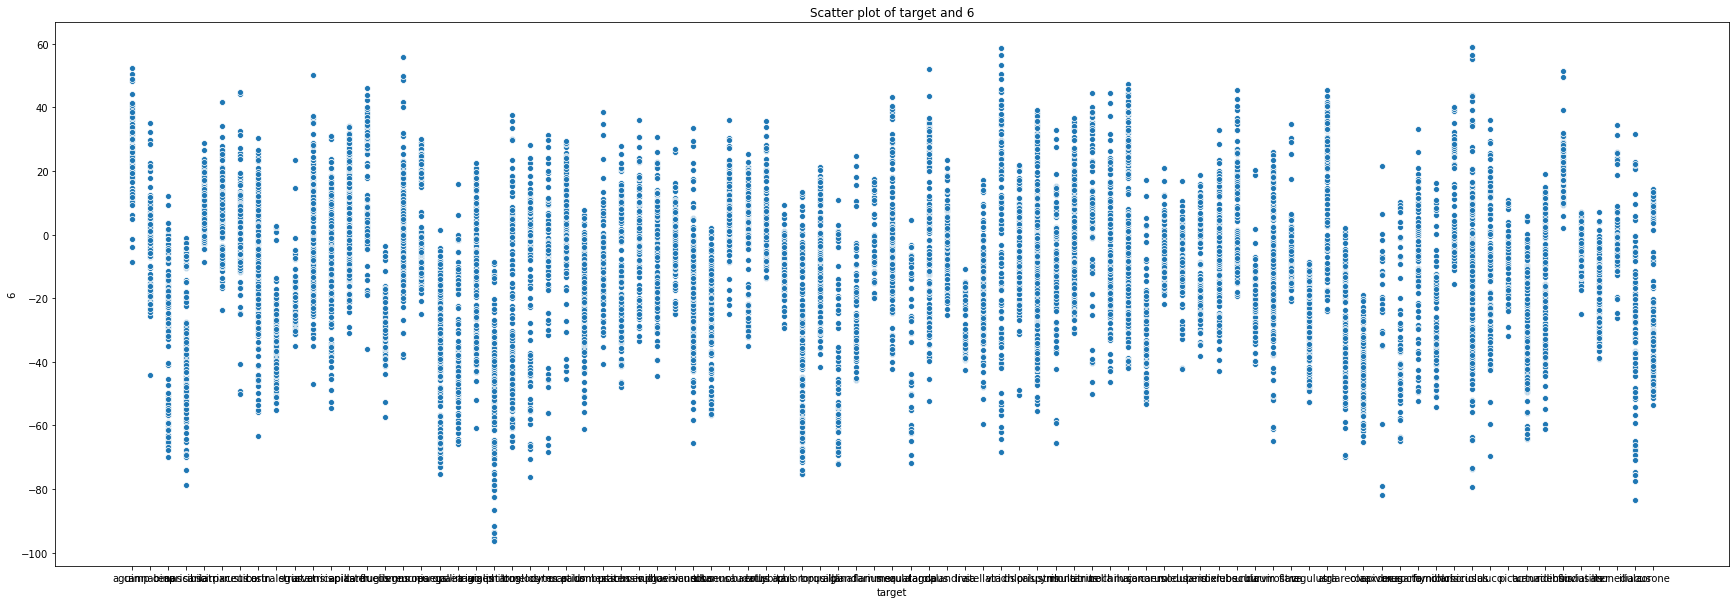

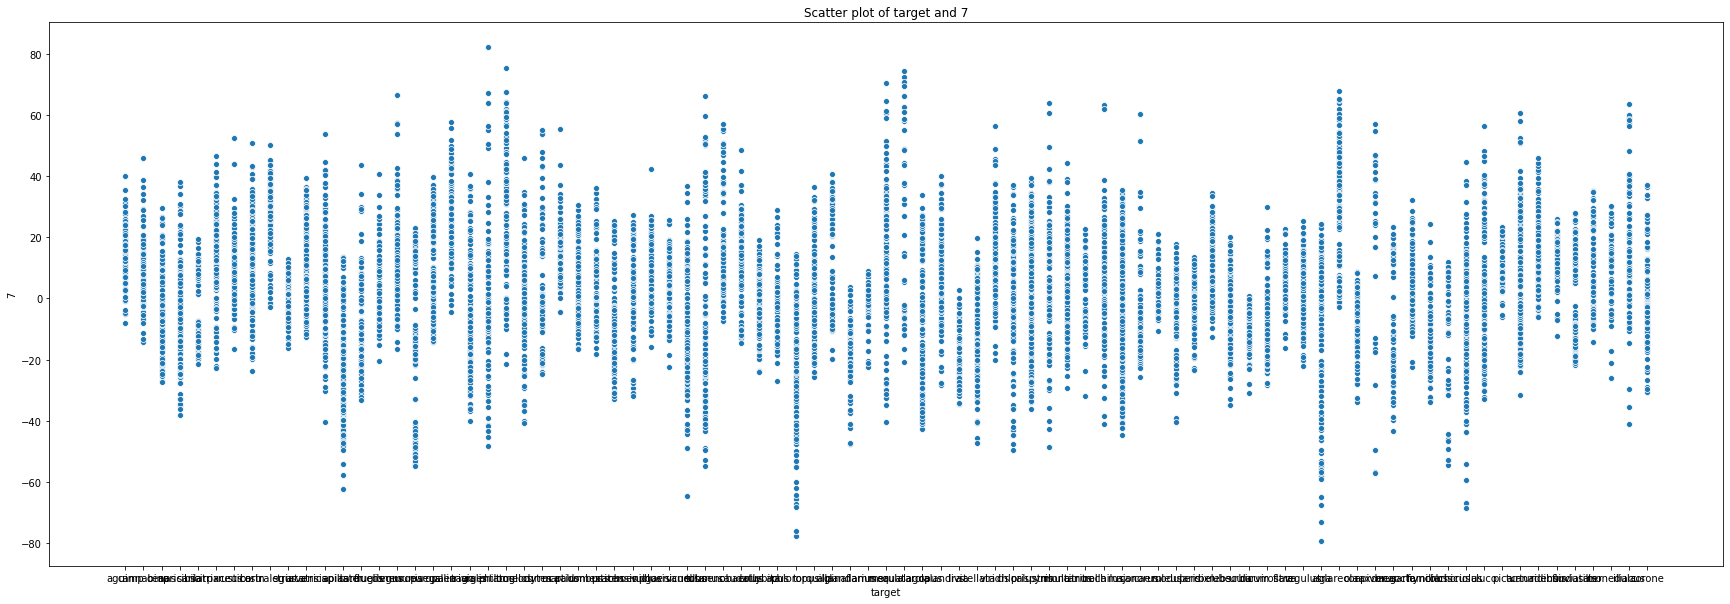

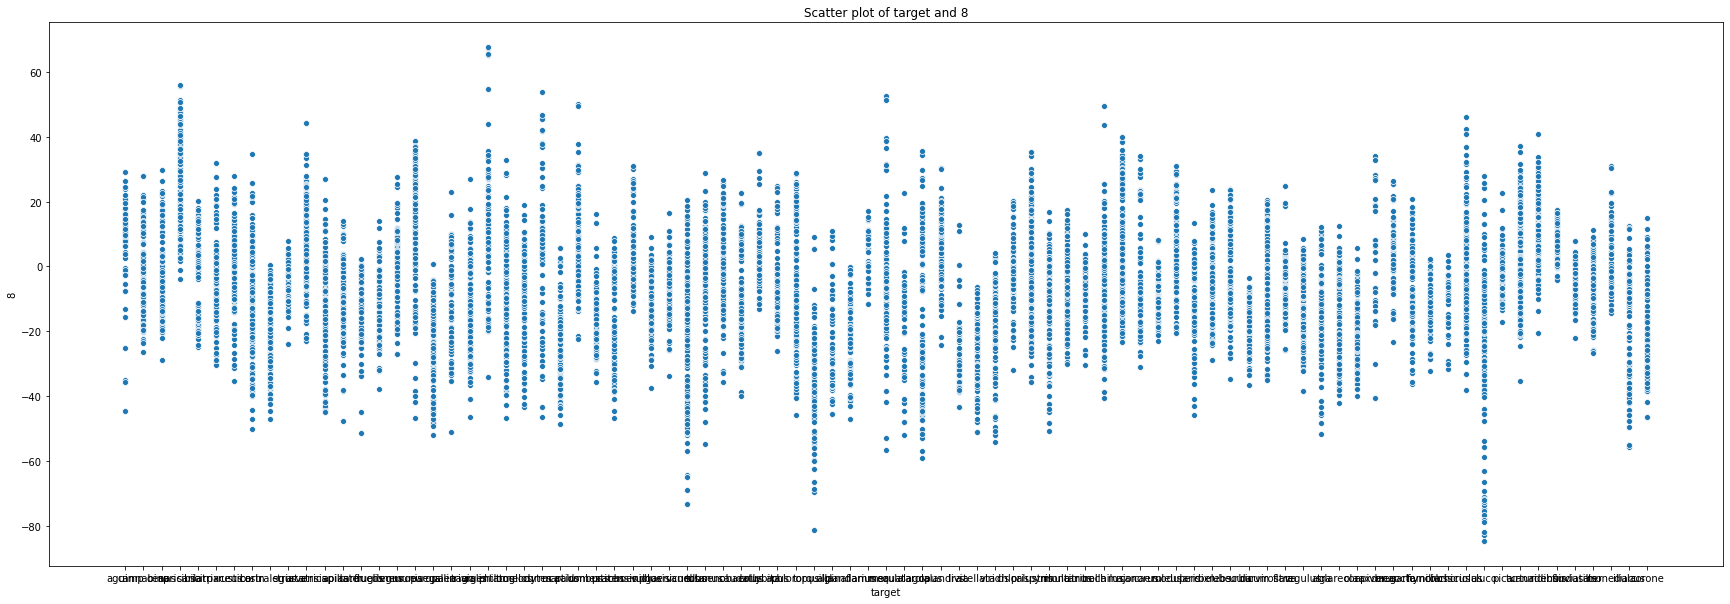

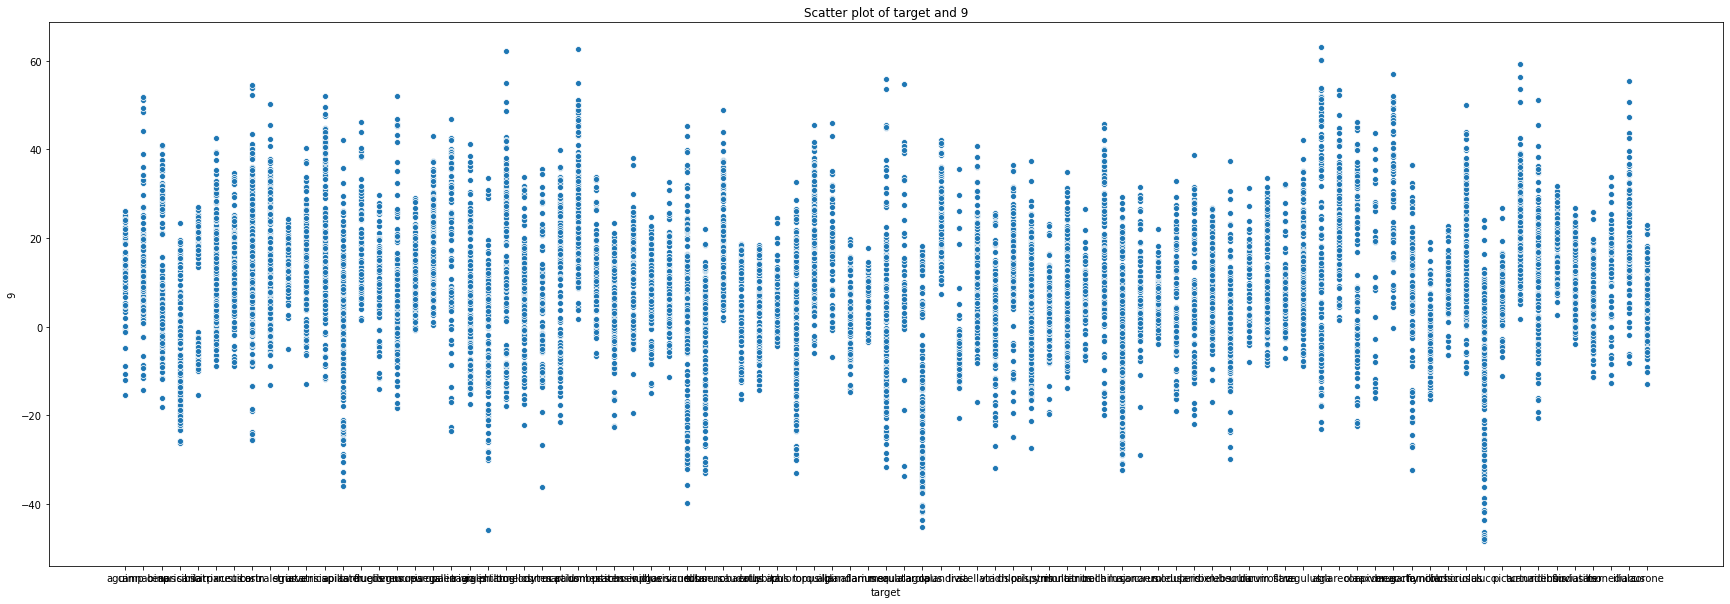

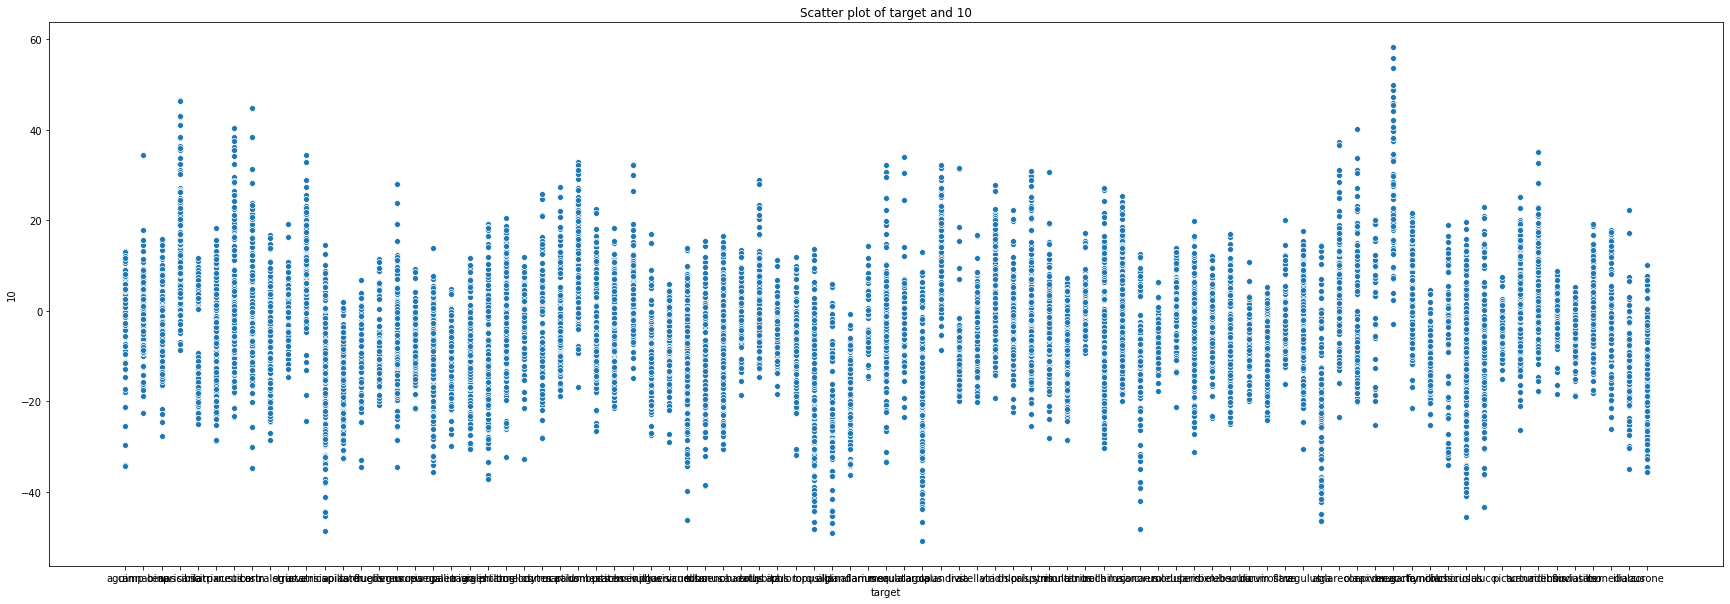

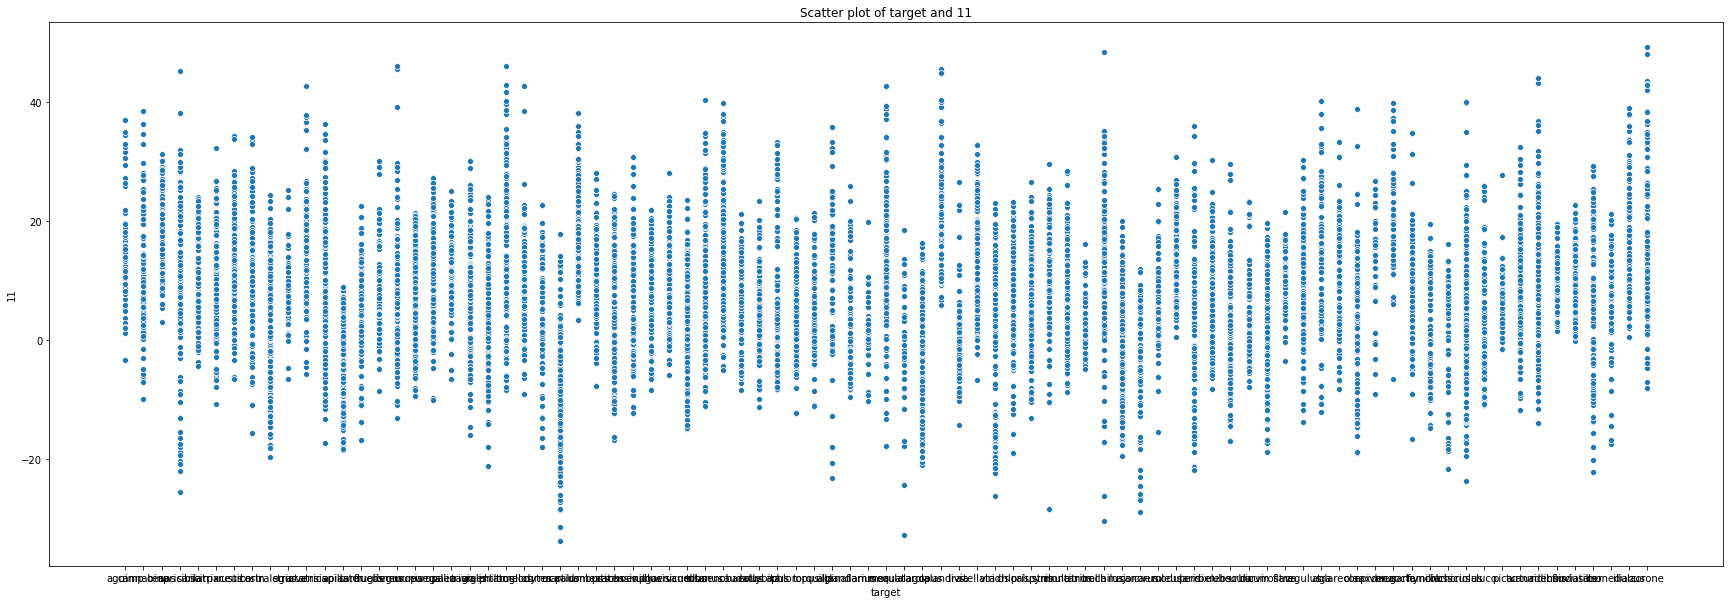

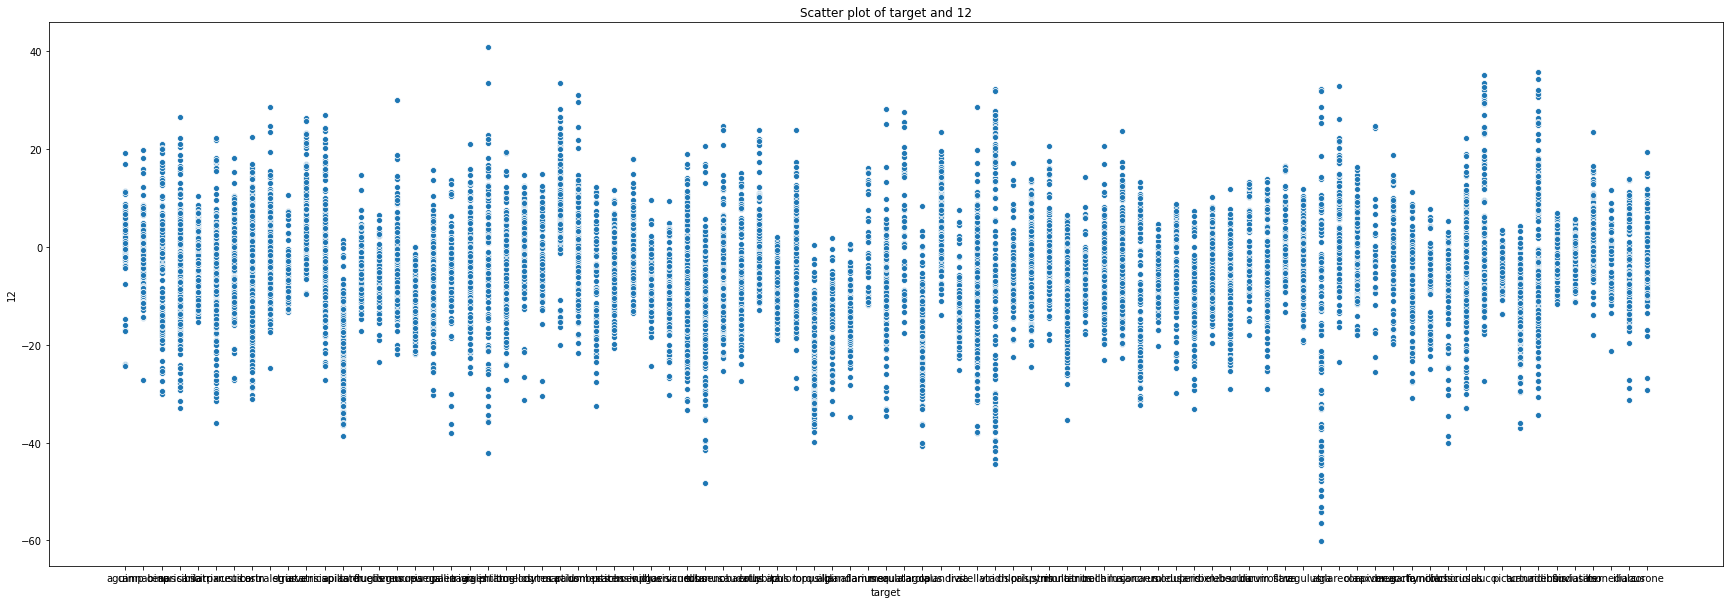

In [0]:
# Scatter Plots
def target_scat(df, features, target="target"):
    target = "target"
    for f in features:
        plt.figure(figsize=(30,10))
        sns.scatterplot(x=df[target],y=df[f])
        plt.title("Scatter plot of "+target+" and "+f)
        plt.show()
        
target_scat(train, descriptors,)

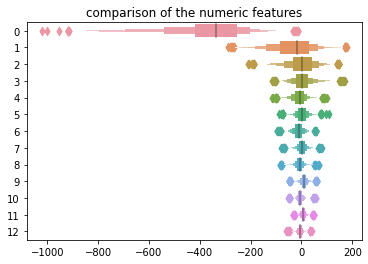

major          288
montanus       286
palustris      280
europaeus      214
fluviatilis    214
              ... 
monedula        62
decaocto        62
squatarola      45
flammea         42
apivorus        28
Name: target, Length: 85, dtype: int64

In [0]:
sns.boxenplot(data=train, orient="h")
plt.title("comparison of the numeric features")
plt.show()
train['target'].value_counts() 

All the features have different ranges and distributions. So, we need to standardize!

In [0]:

X_train = train.drop(['target'], axis = 1) #variables 
y_train = train.target.values  #target
X_test = test.drop(['target'], axis = 1) #variables 
y_test = test.target.values  #target

# Standardization
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
def displaymetrics(y_train,y_predtrain):
  print("-------------------------------------------------")
  print("confusion matrix",metrics.confusion_matrix(y_train, y_predtrain))
  print("Accuracy score:",metrics.accuracy_score(y_train, y_predtrain))
  print("recall score:",metrics.recall_score(y_train, y_predtrain, average=None))
  print("precision score:",metrics.precision_score(y_train, y_predtrain, average=None))
  print("f1 score:",metrics.f1_score(y_train, y_predtrain, average=None))
  print("-------------------------------------------------")
  print("\n\n\n")
  return

In [0]:
model = RandomForestClassifier(n_estimators=500, bootstrap = True, max_features = 'sqrt')

model.fit(X_train,y_train)
y_predtrain=model.predict(X_train)
print("Random forest results:")
print("For Train data")
displaymetrics(y_train,y_predtrain)

y_predtest=model.predict(X_test)
print("For Test data")
displaymetrics(y_test,y_predtest)



In [0]:
model = SVC(kernel = 'rbf', gamma =0.1)
model.fit(X_train,y_train)
y_predtrain=model.predict(X_train)
print("SVM results:")
print("For Train data")
displaymetrics(y_train,y_predtrain)

y_predtest=model.predict(X_test)
print("For Test data")
displaymetrics(y_test,y_predtest)

In [0]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train,y_train)
y_predtrain=model.predict(X_train)
print("SVM results:")
print("For Train data")
displaymetrics(y_train,y_predtrain)

y_predtest=model.predict(X_test)
print("For Test data")
displaymetrics(y_test,y_predtest)